# Breast Cancer Classification - Data Exploration and Preprocessing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Dataset

In [2]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"\nTarget distribution:")
print(f"Malignant (0): {np.sum(y == 0)}")
print(f"Benign (1): {np.sum(y == 1)}")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569

Target distribution:
Malignant (0): 212
Benign (1): 357


## 2. Data Exploration

In [3]:
# Create DataFrame for easier exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Basic statistics
print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0

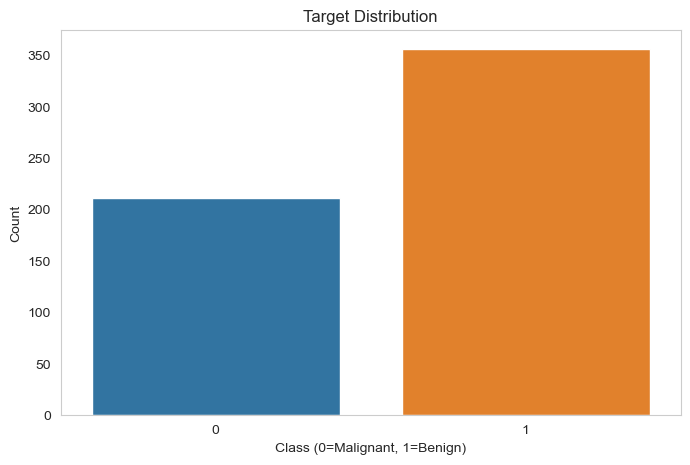

In [6]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Target Distribution')
plt.xlabel('Class (0=Malignant, 1=Benign)')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [7]:
# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"\nFeature names (first 10):")
for i, name in enumerate(data.feature_names[:10]):
    print(f"{i+1}. {name}")

Missing values: 0

Feature names (first 10):
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness
6. mean compactness
7. mean concavity
8. mean concave points
9. mean symmetry
10. mean fractal dimension


## 3. Feature Scaling

In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original feature ranges:")
print(f"Min: {X.min(axis=0)[:5]}")
print(f"Max: {X.max(axis=0)[:5]}")
print(f"\nScaled feature ranges:")
print(f"Min: {X_scaled.min(axis=0)[:5]}")
print(f"Max: {X_scaled.max(axis=0)[:5]}")

Original feature ranges:
Min: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02]
Max: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01]

Scaled feature ranges:
Min: [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479]
Max: [3.97128765 4.65188898 3.97612984 5.25052883 4.77091122]


## 4. Train-Test Split

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining target distribution:")
print(f"Malignant: {np.sum(y_train == 0)}, Benign: {np.sum(y_train == 1)}")
print(f"\nTest target distribution:")
print(f"Malignant: {np.sum(y_test == 0)}, Benign: {np.sum(y_test == 1)}")

Training set: 455 samples
Test set: 114 samples

Training target distribution:
Malignant: 170, Benign: 285

Test target distribution:
Malignant: 42, Benign: 72
